# Hypothesis Testing 

## Objectives 

1. Review hypothesis testings from Mondays lecture.
2. Introduce commonly used hypothesis test that leverage the central limit theorem.
3. Expose you to more advanced topics hypothesis testing. 

## Outline

- One sample tests 
   - binomial tests 
   - z tests
   - t tests
- Two sample tests 
   - Student's t-test
   - Welch's t-test
   - Mann Whitney U-test
- Chi-squared (optional)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# One Sample Tests

## Review: One Sample Tests of Population Proportions 

In lecture on Monday we covered the fundamental concepts of hypothesis testing via binomial tests.  We introduced a 10 step process.  

**Question**: What were the 10 steps we introduced? 
<br><br>
<details>
  <summary> Link</summary>
<ol>
<li> State a scientific question. 
<li> State the null hypothesis.
<li> State the alternative hypothesis.
<li> State the test statistic
<li> Determine distribution under null hypothesis
<li> Select a significance level
<li> Collect Your Data.
<li> Calculate p-value
<li> Decide whether to reject the null hypothesis
<li> State your results.
    </ol>
</details>

**Questions:**
1. What is the difference between the null and alternative hypothesis?
2. What is the significance level?
3. What is a p-value? 
4. What are the possible results you can obtain when doing a hypothesis test? 

### One Sample Tests of Population Proportions 

<img src='http://minnesotaconnected.com/wp-content/uploads/2014/02/Democrat-Republican.jpg' width=400 >

Suppose there was an election... and we know candidate A needs at least 50% of the vote to win.   We have already conducted a poll from 15 people and we found that 9 people prefer candidate A. 

**Scientific Question:** Does candidate A have atleast 50% of the vote?  

**Null Hypothesis:**

> p = 0.5

**Alternative Hypothesis:**

> p> 0.5

**Test Statistic**

> 9/15 candidates prefer candidate A

**Significance Level** (Note: this is also referred to as the rejection region) 

> 0.05

**Distribution of the null**

> Binomial where n=15 and p=0.5

#### Plot the Binomial PMF

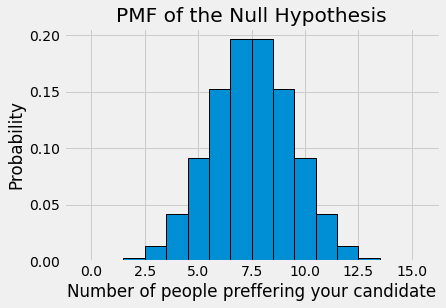

In [2]:
fig, ax = plt.subplots(1, 1)
n, p = 15, 0.5
x = np.arange(0,16)
ax.bar(x, stats.binom.pmf(x, n, p), 1, lw=1, edgecolor='black', label='Null Hypothesis')
ax.set_title("PMF of the Null Hypothesis")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of people preffering your candidate")
plt.show()

#### Calculate a P-Value

<p>The p-value is the probability of producing the observation or a value more extreme given the null hypothesis is true.  Hence, the cumulative density function for at our observed value will tell use this probability.</p>

In [3]:
print("Cumulative probability is or p-value: {}".format(1 - stats.binom.cdf(8, n, p)))

Cumulative probability is or p-value: 0.303619384765625


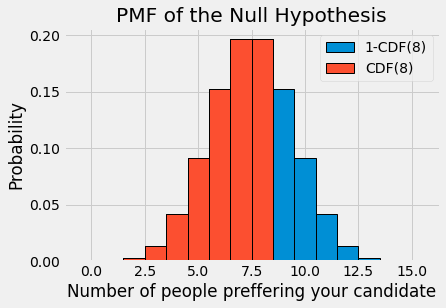

In [4]:
fig, ax = plt.subplots(1, 1)
n, p = 15, 0.5
x = np.arange(0,16)
ax.bar(x, stats.binom.pmf(x, n, p), 1, lw=1, edgecolor='black', label='1-CDF(8)')
ax.bar(x[:9], stats.binom.pmf(x, n, p)[:9], 1, lw=1, edgecolor='black', label='CDF(8)')
ax.set_title("PMF of the Null Hypothesis")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of people preffering your candidate")
ax.legend(loc='best')
plt.show()

#### We fail to reject the null hypothesis
<p>We can see that our p-value is less extreme than our significance level (0.3 > 0.05), and therefore we fail to reject the null hypothesis. </br> </br>


## One Sample Test of Populations Proportions: More Data
Ok, let's say instead that we had more data.  That is we conducted a much larger poll from 10,000 people and we found that 5,100 people prefer candidate A.

In this case we can leverage the Central Limit Theorem.  

**Review Questions**
1. What is the central limit theorem (CLT)? 

If we leverage the central limit theorem we can know the following:

$$ Binomial(10000, 0.5) \approx N(10000 \times 0.5, \sqrt{10000 \times 0.5 \times 0.5}) $$

Note we are using known equations for the expected value and variance of the normal distribution above. This approximation is helpful because it is both very accurate and more computationally efficient to consider a normal distribution than a binomial when there are a large number of trials.  

Now in order to test the same hypothesis as the previous example we could calculate our p-value using the normal distribution as our null instead of the binomial. 

In [5]:
norm = stats.norm(loc=10000*0.5, scale = np.sqrt(10000*0.5*0.5))
print("Cumulative probability is or p-value: {}".format(1 - norm.cdf(5100)))

Cumulative probability is or p-value: 0.02275013194817921


Do I need to subtract one in the equation above? 

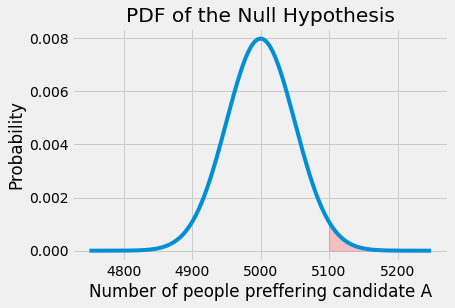

In [6]:
fig, ax = plt.subplots(1, 1)
n, p = 15, 0.5
x = np.arange(4750,5250)
ax.plot(x, norm.pdf(x))
ax.fill_between(x, norm.pdf(x), 0, 
                   where=( (x >= 5100) ),
                   color="red", alpha=0.2)
ax.set_title("PDF of the Null Hypothesis")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of people preffering candidate A")
plt.show()

Ok, In this case we **reject the null hypothesis**.  

Additionally, we have introduced our first central limit theorem based hypothesis test -- the z-test.  

## One Sample z - test 

A z-test is a statistical hypothesis test where the distribution of the test statistic under the null hypothesis can be approximately normally distributed.  It is commonly used to ask if a mean of a distribution is a specific value.  Therefore, a z-test can leverage the Central Limit Theorem (CLT) as this implies that the distribution of the sampling means will be normally distributed. 

Let's dive into another example to get comfortable with the z-test...

**Example**

> Suppose we know that the population average IQ score in the US is 105 with a standard deviation of 15.  We want to see if taking fish oil daily has an effect on a persons IQ.  We sample 50 people who we asked to take fish oil daily for the last year and find that at the end of that year their mean IQ score is 135.  Does fish oil effect IQ score? 

<img src='https://www.cognitune.com/wp-content/uploads/2018/11/omega-3-fish-oil-main.jpg?442215&442215' width = 300 />
 

1. **State a scientific question:** 
> Does fish oil effect IQ score? 
2. <b>State the null hypothesis:</b> 
> $\mu_{\text{fish oil}} = 105$ 
3. <b>State the alternative hypothesis:</b> 
> $\mu_{\text{fish oil}} \neq 105$
4. <b>State the test statistic:</b> 
> 50 people who have taken fish oil
5. **Determine distribution under null hypothesis:**
> Here is where we leverage the CLT.  Under the null hypothesis and based on our test statistic, we know that the distribution of sample means of size 50 from the general population should be normally distributed with mean $105$ and standard deviation $\frac{15}{\sqrt{50}}$ .  This becomes the distribution of the null hypothesis.  

6. **Select a significance level** 
> $\alpha = 0.05$
7. **Collect Your Data:** 
> 135 IQ for 50 people who have taken fish oil
8. **Calculate p-value:**




In [45]:
mu = 105 
std = 15
sample_size = 50 

# Compute two-tailed p-value
p_value = 2 * (1- stats.norm(loc=mu,scale=std/np.sqrt(sample_size)).cdf(135))
p_value

0.0

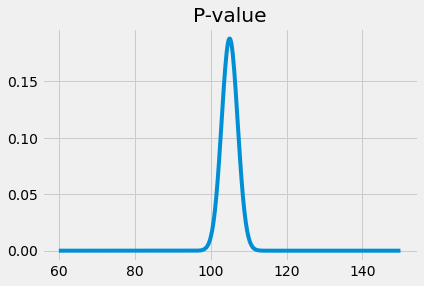

In [46]:
x = np.linspace(60,150,num=500)
y = stats.norm(loc=mu,scale=std/np.sqrt(sample_size)).pdf(x)

fig,ax= plt.subplots()
ax.plot(x,y)
ax.fill_between(x, y, 0, 
                   where=( (x >= 135) | (x <= 75) ),
                   color="red", alpha=0.2)
ax.set_title('P-value');

9. **Decide whether to reject the null hypothesis**
> Since the p-value is 0.0 and that value is less than 0.05, we decide to reject the null hypothesis
10. State your results.
> We reject the null hypothesis that 
_____________________

Performing a z-test is great when our sample size is large enough to ensure that the distribution of the sample means is normal.  What do we do when our samples size is less than ~30?  What if we do not know the standard deviation of the population? This is where we use a t-test.  

### One sample t-test or Student's t-test 

A z-test is a statistical hypothesis test where the distribution of the test statistic under the null hypothesis can be approximately the t-distribution. The t-distribution is commonly used when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown. 

<img src='http://vignette3.wikia.nocookie.net/beer/images/9/92/Guinness.jpg/revision/latest?cb=20130322204725' width=200 >

The student's t-test was originally created by a Guiness employee named William Gosset.  At the time Guiness were not allowed to publish their work. To get around this rule he published this work under the name 'Student', this the Student t-test.  The following example was inspired by Gossett.  

**Example**

One of Gosset’s analyses focused on malt extract, which was measured in “degrees saccharine” per barrel of 168 lbs. malt. At the time, an extract in the neighborhood of 133° gave the targeted level of alcohol content for Guinness’s beer. A higher extract affected the life of the beer, and also the alcohol content which in turn affected the tax paid on alcoholic beverages. 

In Gosset’s view, +/-0.5° was a difference or error in malt extract level which Guinness and its customers could swallow.  Getting samples were expensive and he wanted to use as few as possible. He determined that "in order to get the accuracy we require we must take the mean of at least four determinations.”

<b>Null Hypothesis</b>: The mean degrees of saccharine in a Guiness beer is equal to 133°. <br>
<b>Alternative Hypothesis</b>: The mean degrees of saccharine in a Guiness beer is not equal to 133°.


In [9]:
# Null Hypothesis : The mean degrees of saccharine in a Guiness beer is 133 
H0_mu0 = 133

# Get Data : last four samples
degrees_saccharine = np.array([133.72, 137.02, 140.88, 135.45])
n = len(degrees_saccharine)
# Calculate sample average and variance, and D.O.F.
xbar = np.mean(degrees_saccharine)
s2 = np.var(degrees_saccharine, ddof = 1)
df = n - 1

#### Calculate a t-score

To calculate the t-score we can use the t distribution in scipy:

In [10]:
stats.t

#### A visual of the t-distribution 

Below I will plot various forms of the t-distribution so you all can see how it changes with various degrees of freedom.

The t-distribution always has mean $0$ and varaince $1$, and has one parameter, the **degrees of freedom**.  Smaller degrees of freedom have heavyer tails, with the distribution beoming more normal as the degrees of freedom gets larger.

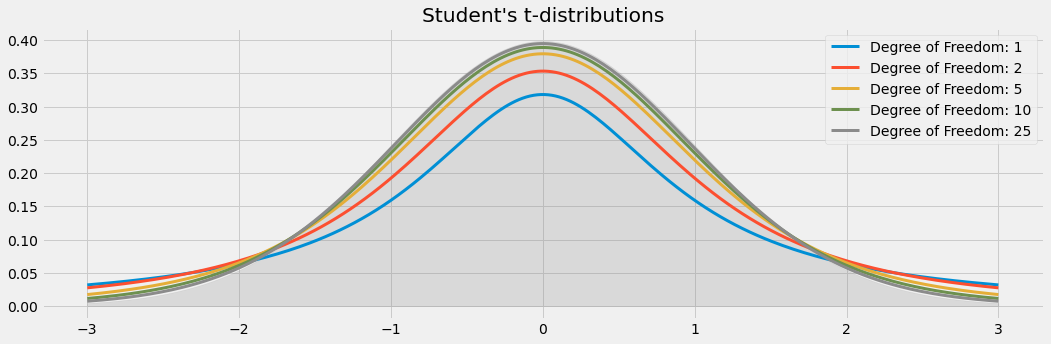

In [11]:
# t-distribution with diff df.
dfs = [1, 2, 5, 10, 25]
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 5))

normal = stats.norm(0, 1)
ax.fill_between(x, normal.pdf(x), color="grey", alpha=0.2)
for df in dfs:
    students = stats.t(df)
    ax.plot(x, students.pdf(x), linewidth=3,
            label="Degree of Freedom: {}".format(df))
ax.legend()
ax.set_title("Student's t-distributions");

#### Calculate a t-score

The input variable is the t-score or the number of standard deviation we are away from the mean: 

$$t_{score} = \frac{ \hat{x} - \mu } { \sqrt \frac{s^2}{n}}$$

where $\hat{x}$ is your test statistic, $\mu$ is the population mean, $s$ is an approximation of the population standard deviation (done via the data you have), and n is the sample size. 

Additionally we will need to specify the degrees of freedom (df) or $n-1$.  

In [12]:
# Because we elect a two tailed test, we double the value of the CDF at the observed average
# input variables of stats.t.cdf is the t-score and the number of degrees of freedom
print(2 * (1 - stats.t.cdf((xbar - H0_mu0)/np.sqrt(s2/n), df = df))) 

0.020852920509138784


We reject the null hypothesis.

## Summary: One Sample Tests

We have just covered two new types of one sample tests the z and the t tests.  Below I highlight this more common applications of both tests you will see.  

**z-tests**

- When do I use a z-test? 
> - single population proportion compared to a hypothesis valued when your sample size is large
> - Note: we assume the binomial distribution can be approximated as normal in this test by leveraging the CLT.  Thus sample sizes need to be large. 

- What does a generic null hypothesis look like? 
> $$p = p_0$$ <br>

- What is my test statistic? 
> People will often create z and t scores.  This value will tell you how many standard deviations your test statistic is from the value assumed in your null hypothesis.  
> - population proportion: $$\frac{ \hat{p} - p_0} { \sqrt{\frac{p_0 (1-p_0)}{n}}} $$ <br>

- Whats the distribution of the null hypothesis? 
> Normal distribution! 

**t-tests**

- When do I use a t-test? 
> - single population mean to a hypothesized value  
> - t - test are helpful when your sample size is low

- What does a generic null hypothesis look like? 
> $$\mu = \mu_{\text{0}}$$

- What is my test statistic? 
> People will often create z and t scores.  This value will tell you how many standard deviations your test statistic for a standard normal distribution.  
> $$\frac{ \hat{\mu} - \mu_0} {\frac{s}{\sqrt{n}}}$$

- Whats the distribution of the null hypothesis? 
> t- distribution


**Review Question**

1. I am working for Galvanize and I decided to change the layout of our company website.  I know that the old website has a click through rate (CTR) of 10%.  I want to figure out if my new website has a CTR that is higher than the old lay out.  

> What test should I use?  Whats my null and alternative hypothesis?  

# Two Sample Tests

In the previous two examples we were comparing one sample mean to a known population and determining if the sample was different than the population. However, there may be scenarios where we do not have information on an entire population and we would like to compare two sample means.  

Two sample tests are used to compare the means of two populations.  Below are a few examples:

**Example Problem 1** 
> I could split Galvanize students into two populations Age > 30 and Age <= 30.  Then I could ask is the mean assessment scores of these two populations the same or different? 

**Example Problem 2**
> You have a dataset from a recent marathon in Austin with runner demographics and marathon times. You want to determine if runners from Texas and runners from NY have different mean marathon times.  

## Types of two sample tests

There are generally two types of test that can accomplish comparing two sample means:

1. Two Sample Student's t-test
2. Welch's t-test 

These test have different requirements...

### Student's t-test 

The student's t-test has the following requirements:

- The two distributions population need to have the same variance.

These requirements are rare, so we will focus on Welch's t-test.  

### Two Sample Approximate Test of Population Means (Welch's t-test)

Unlike the student's t-test, the Welch's t-test has the ability to compare two sample means when the two population variances are not the same.  

**Example Hypothesis Test**

<img src='../../binomial-tests/Juliana/images/kickflip.jpg' width=400 />

Matt and Nick want to see who can kickflip **higher**.  They set up a measuring tape, and each carefully measure the heights of 25 of thier kickflips (in feet).

In [13]:
matt_heights = [1.5, 0.9, 0.9, 1.3, 2.1, 1.9, 1.6, 1.4, 2.3, 1.0, 1.5, 0.9, 2.1,
                1.3, 1.4, 2.1, 1.2, 1.7, 1.7, 2.0, 1.6, 1.2, 1.6, 1.7, 1.5]
nick_heights = [1.9, 1.8, 1.3, 2.3, 1.7, 1.9, 2.7, 2.1, 2.2, 1.5, 1.8, 2.0, 1.1,
                1.7, 2.1, 1.5, 2.3, 1.5, 2.0, 2.4, 1.5, 1.4, 1.6, 1.8, 1.0]

First, let's visualize the data 

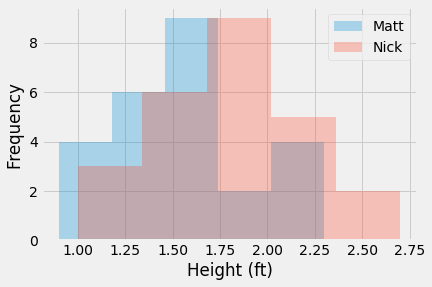

In [38]:
fig, ax = plt.subplots()
ax.hist(matt_heights,alpha=0.3,bins=5,label='Matt') #density = True
ax.hist(nick_heights,alpha=0.3,bins=5,label='Nick') #density = True
ax.set_xlabel('Height (ft)')
ax.set_ylabel('Frequency ')
ax.legend();

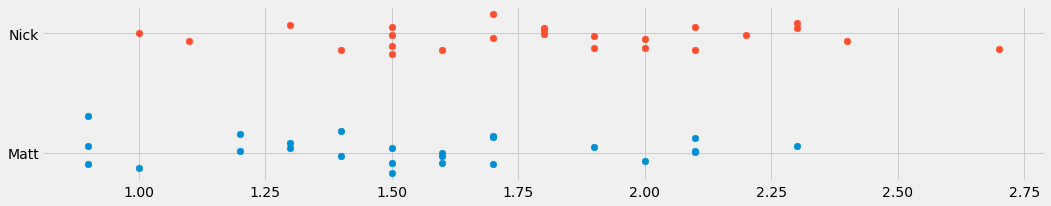

In [15]:
# heights: matt vs nick
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(matt_heights, 
           np.repeat(0, len(matt_heights)) + \
           np.random.normal(0, 0.1, len(matt_heights)), ## jitter
           s=45)
ax.scatter(nick_heights, 
           np.repeat(1, len(nick_heights)) + \
           np.random.normal(0, 0.1, len(matt_heights)), 
           s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Matt", "Nick"]);

#### Write down the Null and Alternative Hypothesis 

**Null:** There is no difference in the average heights of kickflips performed by Nick and Matt.

**Alternative:** There is a difference in the average heights of kickflips performed by Nick and Matt.

#### Create a Probablistic Model of the Situation Assuming the Null Hypothesis is True

Our question concerns population averages (is Matt's population average different than Nick's).  Our measurements are **sample averages**, which, from the central limit theorem, we know are approximately normally distributed given the population average

$$ \text{Sample average of Matt's kickflips} \sim N \biggl( \mu_M, \sqrt{\frac{\sigma^2_M}{25}} \biggr) $$
$$ \text{Sample average of Nick's kickflips} \sim N \biggl( \mu_N, \sqrt{\frac{\sigma^2_N}{25}} \biggr) $$

Ok, we know have two distributions -- but we need one distribution and one that describes the distribution of the null hypothesis.  We could consider the distribution of $\mu_{Matt} - \mu_{Nick}$.  Let's simulate what that distribution might look like... 

In [49]:
# parameters for sample sizes
numsamp=1000
numsamp_means = 250
# distributions of two populations we are comparing
dist1 = stats.norm(loc=5,scale=2)
dist2 = stats.norm(loc=5.5, scale= 3)
#dist1 = stats.expon(scale=2)
#dist2 = stats.norm(loc=0, scale=1)

# code to get distribution of the difference of means
mean_diff = np.zeros(numsamp)
for i in range(numsamp):
    mean1 = dist1.rvs(numsamp_means).mean()
    mean2 = dist2.rvs(numsamp_means).mean()
    mean_diff[i] = mean2 - mean1

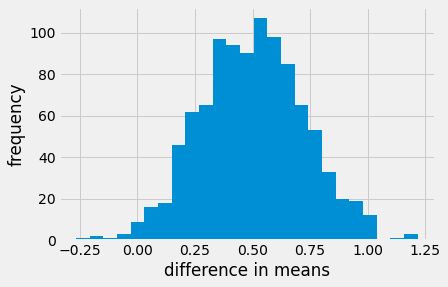

In [50]:
fig,ax= plt.subplots()
ax.hist(mean_diff,bins=25)
ax.set_ylabel('frequency')
ax.set_xlabel('difference in means');

If we are willing to assume that the height of Matt's individual kickflips are **independent** from Nick's, then we can compress the important information into one normal distribution

$$ \text{Difference in sample averages} \sim N \biggl( \mu_M - \mu_N, \sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}} \biggr) $$

Under the assumption of the null hypothesis

$$ \text{Difference in sample averages} \sim N \biggl( 0, \sqrt{\frac{\sigma^2_M}{25} + \frac{\sigma^2_N}{25}} \biggr) $$

Is the assumption that the difference of the means normal, a good assumption?  

It depends... 

**Cases where it is a good approx.**
- If the variances are known and close in value(or equal), this is a good assumption (use a z-test). 

**Cases where it is not a good approx.**
- If we have two independent variances and different samples sizes this is not an ideal approximation.
- When we need to estimate the variance of a normal distribution via calculation of standard error.  

### Welch's t-test

To rectify the problem, we first convert to a sample statistic whose variance is expected to be $1$ (as the mean being 0, this is called standardization, not normalization), and we approximate the population standard deviations using the test statistic data we have 

$$ T = \frac{\text{Difference in sample averages} - 0}{\sqrt{\frac{\hat \sigma^2_M}{25} + \frac{\hat \sigma^2_N}{25}}} $$

In [18]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [19]:
test_statistic = welch_test_statistic(matt_heights, nick_heights)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -2.38


Using approximate values for the population standard deviations introduces errors and we can not longer reliable assume that the distribution is normal. Instead of using a normal distribution, we must now use a **Student's t-distribution**, which accounts for the extra uncertainty in estimating the two new parameters.

**Welch's t-test** says that in this situation, the distribution of T is well approximated with a Student's distribution with an appropriate degree of freedom.  The degrees of freedom calculation is complex, enough that it has a name, the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Welch–Satterthwaite_equation).  The resulting application to our situation results in [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test).


In [20]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [21]:
df = welch_satterhwaithe_df(nick_heights, matt_heights)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 47.97


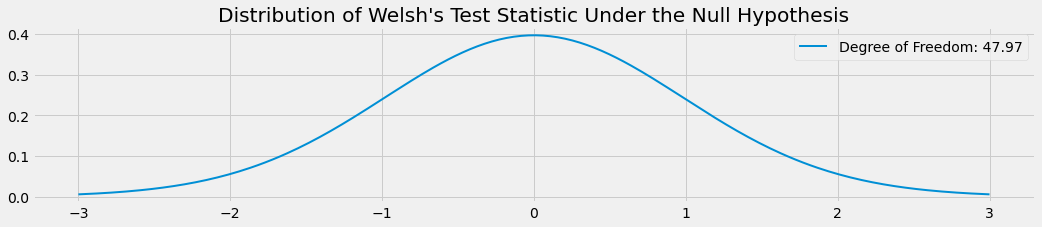

In [22]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

**Also, the above is not always true!**  The $T$ statistic only has a t-distribution **under the assumption that the population distributions are Normal**!    

**Cases when we should use a Welch's t-test** 

- Sample sizes are large -- the CLT has kicked in and our approximations that the samples means are normal are very good. 
- Samples sizes are low -- CLT has not kicked in; so in this case we can only use a Welch's t-test if we have a valid reason for thinking that the population distribution is normal.

#### Set Significance level

Given the bragging rights at stake here, and how much they value to friendship, Matt and Nick decide to be reasonably skeptical, so take $\alpha = 0.05$.

#### Calculate p-value


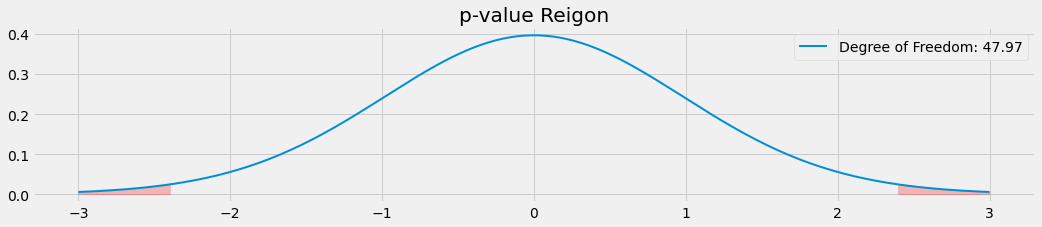

In [23]:
# p-val
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon");

In [24]:
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average kickflip height: {:2.2f}".format(p_value))

p-value for different average kickflip height: 0.02


So we have enough evidence to conclude that **one of Nick or Matt is better**.

Looks like in this case we should be able to conclude that Nick is better, let's test that.

In [25]:
test_statistic = welch_test_statistic(nick_heights, matt_heights)

p_value = 1 - students.cdf(test_statistic)
print("p-value for Nick average kickflip height greater than Matt: {:2.3f}".format(p_value))

p-value for Nick average kickflip height greater than Matt: 0.011


So Nick is clearly better.

## Bonferroni Correction

Often in hypothesis testing you will want to compare more than just two population.  In cases where we are making multiple comparisons we need to compensate for the fact that we are more likely to incorrectly reject the null hypothesis in these cases.  One of the simplest and more conservative ways of doing this is via the **Bonferroni Correction**.  It works as follows: 

Let $H_1, ... H_m$ be a family of hypothesis tested with corresponding p-values $p_1, ... p_m$.  Let m be the total number of hypothesis being tested and $\alpha$ be your selected significance level.  In order to reject the null hypothesis with the Bonferroni correction the following must be true:   

$$p_i \leq \frac{\alpha}{m}$$

**Example** 
> You have a dataset from a recent marathon in Austin with runner demographics and marathon times. You want to determine if 18-25 year olds have different marathon times from 26-35 year olds, 36-45 year olds or 45-55 year olds. You set your significance level to 0.05

> In this case your p-value would need to be less than $\frac{0.05}{3}$ in order to reject the any null hypothesis.  

## Non-Parametrics: Mann-Whitney Signed Rank Test -- U Test

The [Mann-Whitney U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) is a modern alternative to the classical Student's and Welch's t-test that makes good use of modern computing power.  It makes **no** distributional assumptions (unlike the t-test, which assumes the populations are normal), and can always be used instead.

### Rank Sums and the Test Statistic

Let's go back to our example of Matt and Nick competing to kickflip higher.

[Text(0, 0, 'Matt'), Text(0, 1, 'Nick')]

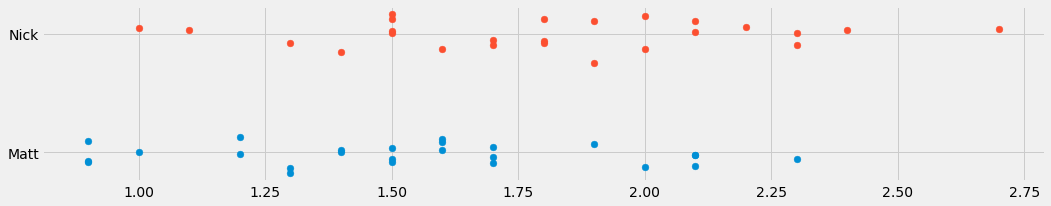

In [26]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(matt_heights, np.repeat(0, len(matt_heights)) + np.random.normal(0, 0.1, len(matt_heights)), s=45)
ax.scatter(nick_heights, np.repeat(1, len(nick_heights)) + np.random.normal(0, 0.1, len(matt_heights)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Matt", "Nick"])

The idea of the Mann-Whitney test is to view this as a competition.  We let each of Nick's kickfips compete against all of Matt's kickflips, and see how many times it wins (i.e. how many of Matt's kickflips it beats).  We then add these number of wins up over all of Nick's kickflips.

In [27]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [28]:
nick_wins = count_winning_pairs(nick_heights, matt_heights)
matt_wins = count_winning_pairs(matt_heights, nick_heights)
print("Number of Nick Wins: {}".format(nick_wins))
print("Number of Matt Wins: {}".format(matt_wins))

Number of Nick Wins: 424.0
Number of Matt Wins: 201.0


Notice that the total number of wins is just the total number of comparisons between one of Matt's kickflips and one of Nicks

In [29]:
print("Total Number of Wins: {}".format(nick_wins + matt_wins))
print("Total Number of Comparisons: {}".format(
    len(nick_heights)*len(matt_heights)))

Total Number of Wins: 625.0
Total Number of Comparisons: 625


To test the hypothesis that Nick is better than Matt, we need to adopt a Null hypothesis.  The Null for the Mann-Whitney test is directly related to which competitor is better.

> $H_0$: Matt's Kickflips are equally likely to be higher than Nicks as the other way around.  I.e. 
  
  $$P(\text{Height Matt Kickflip} > \text{Height Nick Kickflip}) = 0.5$$
  
As is usual, assuming this null hypothesis is true, the rank-sum statistic assumes a known (but complicated) distribution.  This time we can't write down the distribution in any explicit way, but python can calculate p-values using it.

In [30]:
res = stats.mannwhitneyu(nick_heights, matt_heights, alternative="greater")
print("p-value for P(Nick > Matt) = 0.5: {:2.3f}".format(res.pvalue))

p-value for P(Nick > Matt) = 0.5: 0.015


Reject the null hypothesis -- Nick is better than Matt. 

## Summary 

We have just covered two new types of one sample tests the z and the t tests.  Below I highlight this more common applications of both tests you will see.  

**Students or Welch's t-tests**

- When do I use a Student's or Welch's t-tests? 
> - When comparing means of two different populations
> - Student's t-test can only be used when the variance of the two populations are the same.  Welch's can be used when the variance is different (most cases). 
> - I can always use a Welch's t-test when my sample is sufficiently large due to the CLT
> - If my sample size is low, I can only use a Welch's t-test if the distributions of the two populations is normally distributed. 

- What does a generic null hypothesis look like? 
> $$\mu_{\text{population 1}} - \mu_{\text{population 2}} = 0$$ <br>

- What is my test statistic? 
> $$\frac{x_1 - x_2 - 0} {\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} } } $$ <br>

- Whats the distribution of the null hypothesis? 
> The t-distribution.  It describes the distribution of the difference between the two sample means. 

**Mann-Whitney Non-parametric test**

- When do I use a non-parametric test? 
> - When a Welch's t-test is not an option
> - aka, when sample size is low and the underlying distributions are not normal

- What does a generic null hypothesis look like? 
> - $P(x_i > y_i) = 0.5$ where x_i and y_i are samples from each of the two distribution

- What is my test statistic? Whats the distribution of the null hypothesis? 
> We don't go into the details of how this computed.  Use scipy's mannwhitneyu function.


FYI: This [paper](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-12-78) has a good discussion of the suggestions I make above for which hypothesis test to choose.

# Optional: Pearson's Chi-Squared Tests (for goodness-of-fit)


**Example**
Suppose my friend owns a restaurant.  I asked her how many customers show up on average to her restaurant each day on average during the week and she gives me the following data:

Monday - 11%
Tuesday - 12%
Wednesday - 12%
Thursday - 15%
Friday - 30%
Saturday - 20% 

Her restaurant is closed on Sunday. This data was obtained pre-COVID and I want to determine if the distribution of customers is the same now as they were previously.  I obtained the following data over the last three months:

Monday - 15%
Tuesday - 15%
Wednesday - 15%
Thursday - 15%
Friday - 20%
Saturday - 20% 

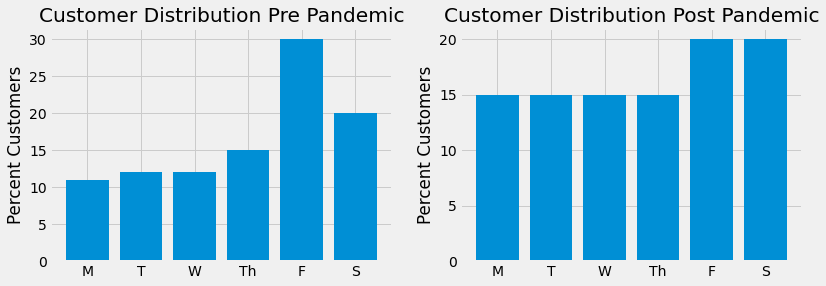

In [31]:
x = np.arange(6)
pre = np.array([11,12,12,15,30,20])
post = np.array([15,15,15,15,20,20])
days = ['M', 'T', 'W', 'Th', 'F', 'S']

def plot_bar(ax, data, title):
    ax.bar(x,data)
    ax.set_xticks(x)
    ax.set_xticklabels(days)
    ax.set_ylabel('Percent Customers')
    ax.set_title(title)

fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_bar(ax[0],pre, 'Customer Distribution Pre Pandemic')
plot_bar(ax[1],post, 'Customer Distribution Post Pandemic')

**Scientific Question** Is the distribution of customers at the restuarant the same as prior to the pandemic? 

**Null hypothesis:** Pre Pandemic distribution is the same as the post pandemic distribution <br>
**Alternative hypothesis:** The distributions are different <br>
**Significance level** $\alpha = 0.05$

In order to run a chi-squared hypothesis test, we will need to compute chi-squared statistic via the following equation:

$$ T = \sum_i \frac{(O_i - E_i)^2}{E_i} $$

where $O_i$ is an observed statistic and $E_i$ is the expected statistic.

In [32]:
def chi_squared_test_statistic(observeds, expecteds):
    numerators = (observeds - expecteds)**2
    ratios = numerators / expecteds
    return np.sum(ratios)

In [33]:
chi_squared_test_statistic(post,pre)

6.287878787878788

The logic of the Chi Squared test is that this quantity follows a certain distribution, the chi squared distribution.  The [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-square_distribution) is the sum of standard normal random number squared.  

> Given a k - sequence of random variables, $x_i$, from N(0,1), then the chi-squared distribution can be represented as $Q = \sum_{i=1}^{k} x_i^{2}$

The chi-squared has one parameter used to describe the distribution, the degrees of freedom or $k$.  You can also think of this as the number of standard normal random numbers you are summing.

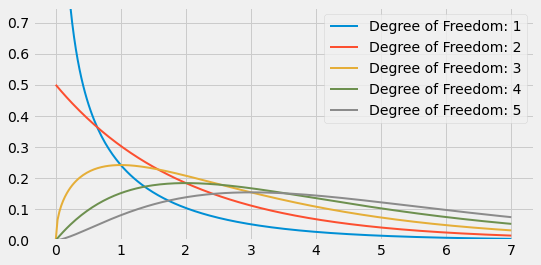

In [34]:
dfs = [1, 2, 3, 4, 5]
x = np.linspace(0, 7, num=250)

fig, ax = plt.subplots(1, figsize=(8, 4))

for df in dfs:
    chisq = stats.chi2(df)
    ax.plot(x, chisq.pdf(x), linewidth=2,
            label="Degree of Freedom: {}".format(df))
ax.set_ylim(0, 0.75)
ax.legend()

In our case the degrees of freedom are one minus the number of variables. So, in this case we will have 5 degrees of freedom.  

In [35]:
T = chi_squared_test_statistic(post,pre)
T

6.287878787878788

In [36]:
test_distribution = stats.chi2(5)
p_value = 1 - test_distribution.cdf(T)
print("p-value for restuarant distribution: {:2.2f}".format(p_value))

p-value for restuarant distribution: 0.28


Another way to do this is to use the tools in scipy! 

In [37]:
ans_fair = stats.chisquare(post, pre, axis=0)
ans_fair

Power_divergenceResult(statistic=6.287878787878788, pvalue=0.27920622370520876)

## Additional resources 

I did not cover all types of hypothesis tests within this lecture.  I would suggest checking out the following resources: 

[Hypothesis Testing Cheat Sheet](https://github.com/GalvanizeDataScience/lectures/blob/Austin/hypothesis-testing/dan/stat_cheatsheet.pdf)  <br>
[Hypothesis Testing Formulas](https://github.com/GalvanizeDataScience/lectures/blob/Austin/hypothesis-testing/dan/hypo_formulas.pdf)

I did not include in this lecture all applications of chi-squared tests, 2-sample z test when comparing population proportions, etc.  Checkout these references to learn more. 